Respuesta de desplazamiento de un sistema conservador discreto debido a excitación sísmica

Matrix data saved to ./Sismos/Sg2_data.csv


,0,1
0,0.00,1.1904
1,0.01,1.1904
2,0.02,1.1904
3,0.03,1.1904
4,0.04,1.1904
...,...,...
1496,14.96,0.0000
1497,14.97,0.0000
1498,14.98,0.0000
1499,14.99,0.0000


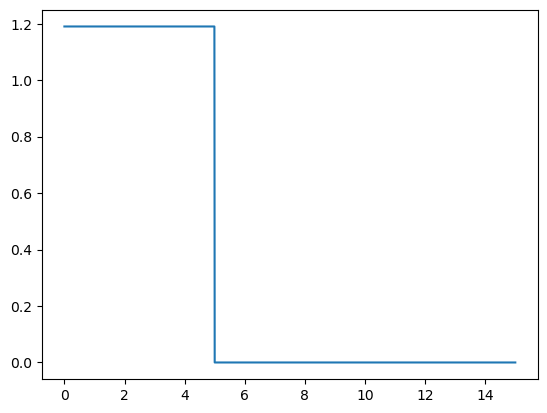

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


n = 2.48
z = 0.4 #g
fa = 1.2
R = 6
g = 9.81 
to = 5
tf = 15.01

L = 3
a = n*fa*z
W = 8 #tons
m = W/g #tons
E = 2000000 #T/m2
I = (0.3**4)/12
k = (12*E*I)/(L**3)
w = np.sqrt(k/m)
T = 2*np.pi/w
delta = 0.01

j = 0
Sg2 = np.zeros((int(tf/delta),2))
for i in np.arange(0,tf,delta):
    Sg2[j,0] = i
    if i < 5: 
        Sg2[j,1] = a
    else:
        Sg2[j,1] = 0
    
    j+=1

tbl_Sg2 = pd.DataFrame(Sg2)

'''
# Save the DataFrame to a CSV file
csv_file_path = './Sismos/Sg2_data.csv'
tbl_Sg2.to_csv(csv_file_path, index=False)
print(f'Matrix data saved to {csv_file_path}')
'''

display(tbl_Sg2)

plt.plot(Sg2[:,0], Sg2[:,1])

,0,1
0,0.00,-0.000000
1,0.01,-0.000006
2,0.02,-0.000024
3,0.03,-0.000052
4,0.04,-0.000088
...,...,...
495,4.95,-0.000277
496,4.96,-0.000306
497,4.97,-0.000323
498,4.98,-0.000330


La deriva elastica es: 0.04947763353513471 %
La deriva inelastica es: 0.04756632785210767 %


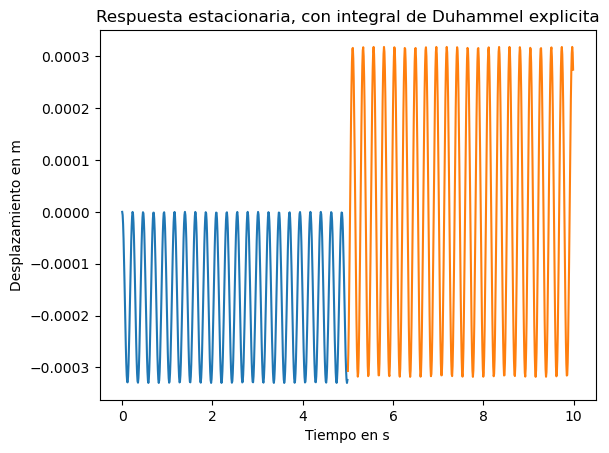

In [3]:
j = 0
xe = np.zeros((int(to/delta),2))
for t in np.arange(0,to,delta):
    xe[j,0] = t
    xe[j,1] = (-a/((w**2)*g))*(1-np.cos(w*t))
    j+=1

j = 0
xt = np.zeros((int((tf-to)/delta),2))
for t in np.arange(to,tf,delta):
    xt[j,0] = t
    xt[j,1] = -a/((w**2)*g)*(np.cos(w*(t-to)) - np.cos(w*t))
    j+=1


tbl_xe = pd.DataFrame(xe)
display(tbl_xe)

plt.plot(xe[:,0], xe[:,1])
plt.plot(xt[:,0], xt[:,1])
plt.title('Respuesta estacionaria, con integral de Duhammel explicita')
plt.xlabel('Tiempo en s')
plt.ylabel('Desplazamiento en m')

Die = (np.max(np.abs(xe[:,1]))-np.min(np.abs(xe[:,1])))/L*0.75*100*R
Dit = (np.max(np.abs(xt[:,1]))-np.min(np.abs(xt[:,1])))/L*0.75*100*R
print(f'La deriva elastica es: {Die} %')
print(f'La deriva inelastica es: {Dit} %')

Metodo Beta Newmark Jr.

,Tiempo en s,Aceleración Sismica en g,Respuesta en Desplazamiento,Respuesta en velocidad,Respuesta en aceleración
0,0.00,1.1904,0.000000,-0.005952,-1.190400
1,0.01,1.1904,-0.000119,-0.011904,-1.102816
2,0.02,1.1904,-0.000293,-0.017418,-0.974663
3,0.03,1.1904,-0.000516,-0.022291,-0.810654
4,0.04,1.1904,-0.000780,-0.026345,-0.616823
...,...,...,...,...,...
1496,14.96,0.0000,0.001925,0.041624,-1.416245
1497,14.97,0.0000,0.002270,0.034543,-1.670395
1498,14.98,0.0000,0.002532,0.026191,-1.863094
1499,14.99,0.0000,0.002701,0.016875,-1.987256


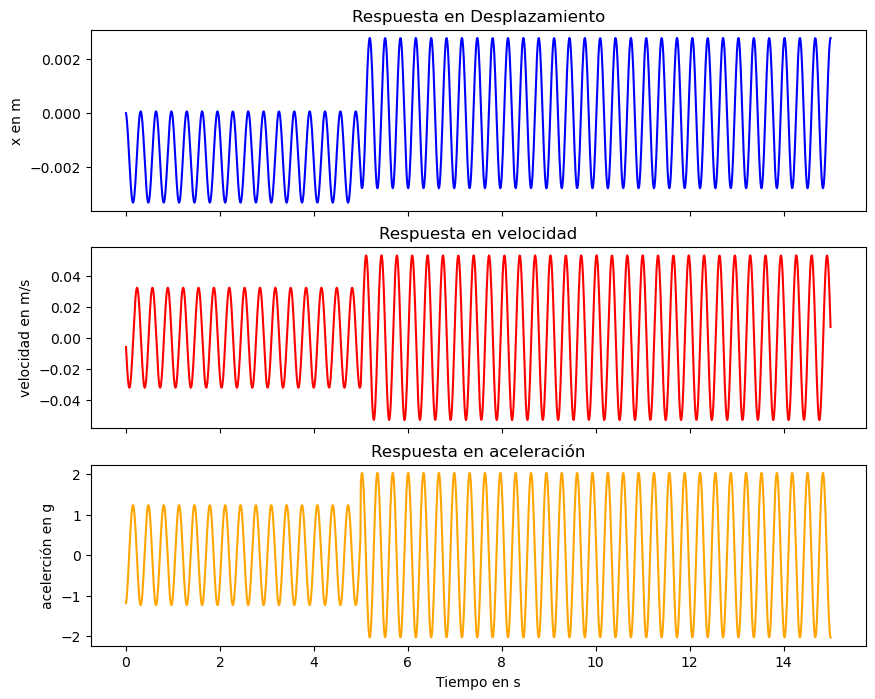

In [8]:
zi = 0

def BNewmark_DS_GR2_2023_02(T,m,w,zi,Sg2):

    delta = 0.01
    Kp = ((2*np.pi/T)**2)*m

    xn1 = np.zeros(len(Sg2))
    xvn1 = np.zeros(len(Sg2))
    xan1 = np.zeros(len(Sg2))

    xo = 0
    xvo = 0
    xn1[0] = xo
    xvn1[0] = xvo
    xan1[0] = ((-Sg2[0,1]*m) - (2*zi*w*m*xvo) - ((w**2)*xo))/m

    for i in np.arange(0, len(Sg2)):
        xn1[i] = xn1[i-1] + (delta*xvn1[i-1]) + (((delta**2)/2)*xan1[i-1])
        xvn1[i] = xvn1[i-1] + (delta*(0.5*(xan1[i-1] + xan1[i])))
        xan1[i] = (1/(m+(2*zi*w*delta*0.5*m)))*((-Sg2[i,1]*m) - (Kp*xn1[i]) - ((2*zi*w*m)*(xvn1[i-1]+(delta*0.5*xan1[i-1]))))

    return xn1, xvn1, xan1

xn1, xvn1, xan1 = BNewmark_DS_GR2_2023_02(T,m,w,zi,Sg2)
tbl_xn1 = pd.DataFrame(xn1)
tbl_xvn1 = pd.DataFrame(xvn1)
tbl_xan1 = pd.DataFrame(xan1)

#Tablas
Resul = pd.DataFrame({ 'Tiempo en s': Sg2[:,0], 'Aceleración Sismica en g': Sg2[:,1], 'Respuesta en Desplazamiento': xn1, 'Respuesta en velocidad': xvn1, 'Respuesta en aceleración': xan1})
display(Resul)


#Graficos
fig, (ax1, ax2, ax3) =plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(Sg2[:,0], xn1, label='xn1', color='blue')
ax1.set_ylabel('x en m')
ax1.set_title('Respuesta en Desplazamiento')

ax2.plot(Sg2[:,0], xvn1, label='xvn1', color='red')
ax2.set_ylabel('velocidad en m/s')
ax2.set_title('Respuesta en velocidad')

ax3.plot(Sg2[:,0], xan1, label='xan1', color='orange')
ax3.set_ylabel('acelerción en g')
ax3.set_xlabel('Tiempo en s')
ax3.set_title('Respuesta en aceleración')

# plt.xlim(0, 1)
plt.show()